In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_items, get_stores, get_sales, get_complete_data, get_germany_data
import prepare

# set figure size
plt.rcParams["figure.figsize"] = (10,8)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = get_complete_data()

In [4]:
df.head()

,Unnamed: 0_x,item,sale_amount,sale_date,sale_id,store,Unnamed: 0_y,store_address,store_city,store_id,store_state,store_zipcode,Unnamed: 0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.00,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,0,1,13.00,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,10,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,1,11.00,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,1,11.00,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,10,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,2,1,14.00,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,0,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [5]:
df = prepare.set_index(df, 'sale_date')

In [6]:
df = prepare.create_date_columns(df, ['year','month','weekday'],'index')

In [7]:
df['total_price'] = df.sale_amount * df.item_price

In [8]:
df.head()

,Unnamed: 0_x,item,sale_amount,sale_id,store,Unnamed: 0_y,store_address,store_city,store_id,store_state,...,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,year,month,weekday,total_price
sale_date,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,1,13.00,1,1,0,12125 Alamo Ranch Pkwy,San Antonio,1,TX,...,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,10.92
2013-01-01 00:00:00+00:00,827178,46,38.00,827179,4,13,516 S Flores St,San Antonio,4,TX,...,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,2013,1,1,176.70
2013-01-01 00:00:00+00:00,226424,13,33.00,226425,5,14,1520 Austin Hwy,San Antonio,5,TX,...,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,603084234561,603084234561,2013,1,1,213.51
2013-01-01 00:00:00+00:00,226424,13,33.00,226425,5,4,1520 Austin Hwy,San Antonio,5,TX,...,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,603084234561,603084234561,2013,1,1,213.51
2013-01-01 00:00:00+00:00,224598,13,46.00,224599,4,13,516 S Flores St,San Antonio,4,TX,...,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,603084234561,603084234561,2013,1,1,297.62


In [9]:
#clean up df
df = df.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0', 'store', 'item'])
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,year,month,weekday,total_price
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,10.92
2013-01-01 00:00:00+00:00,38.00,827179,516 S Flores St,San Antonio,4,TX,78204,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,2013,1,1,176.70
2013-01-01 00:00:00+00:00,33.00,226425,1520 Austin Hwy,San Antonio,5,TX,78218,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,603084234561,603084234561,2013,1,1,213.51
2013-01-01 00:00:00+00:00,33.00,226425,1520 Austin Hwy,San Antonio,5,TX,78218,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,603084234561,603084234561,2013,1,1,213.51
2013-01-01 00:00:00+00:00,46.00,224599,516 S Flores St,San Antonio,4,TX,78204,Garnier Nutritioniste,13,Garnier Nutritioniste Moisture Rescue Fresh Cl...,6.47,603084234561,603084234561,2013,1,1,297.62


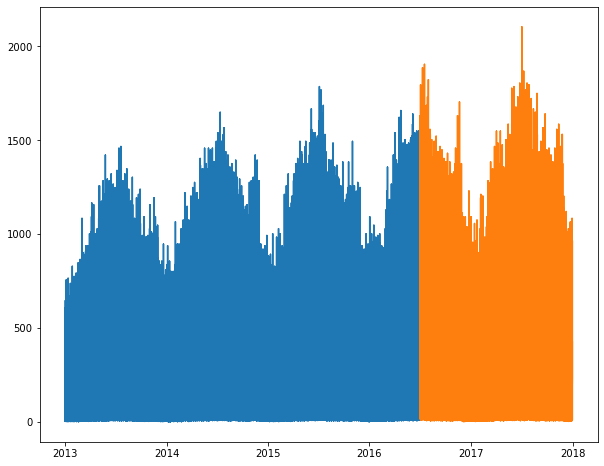

In [10]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.total_price)
plt.plot(test.total_price)

<AxesSubplot:xlabel='month'>

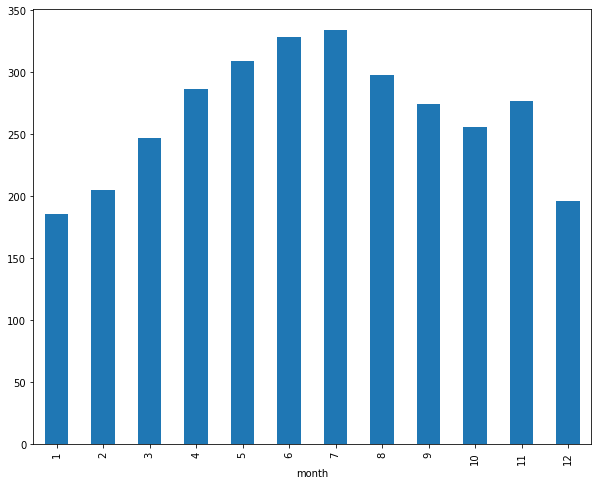

In [11]:

train.groupby('month').total_price.mean().plot.bar()

array([[<AxesSubplot:title={'center':'total_price'}>]], dtype=object)

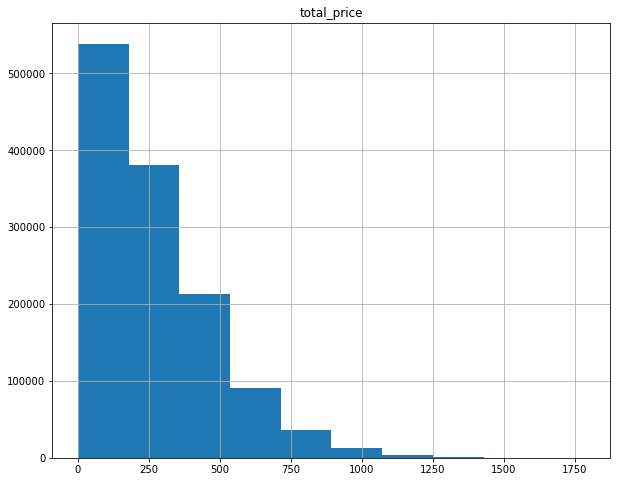

In [12]:
train[['total_price']].hist()

array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'weekday'}>, <AxesSubplot:>]],
      dtype=object)

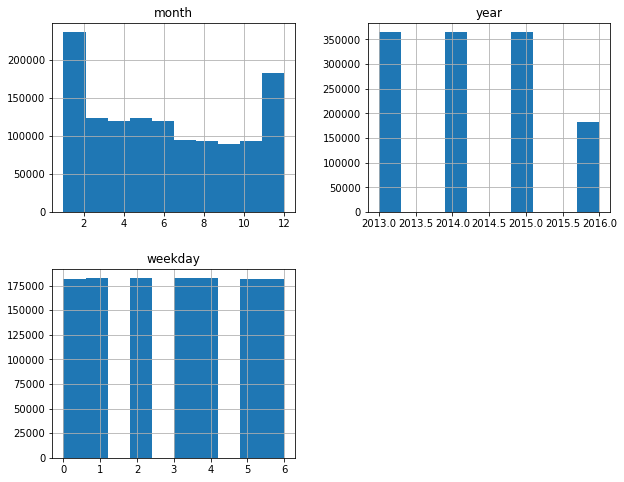

In [13]:
train[['month','year','weekday']].hist()

In [15]:

train.weekday.value_counts()

4    183000
3    183000
2    183000
1    183000
5    182200
6    182000
0    182000
Name: weekday, dtype: int64

<AxesSubplot:xlabel='weekday', ylabel='total_price'>

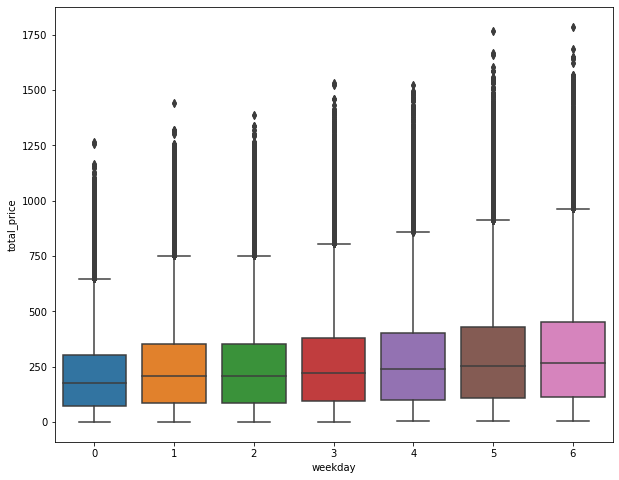

In [16]:
sns.boxplot(data=train, y='total_price',x='weekday')

<AxesSubplot:xlabel='month', ylabel='total_price'>

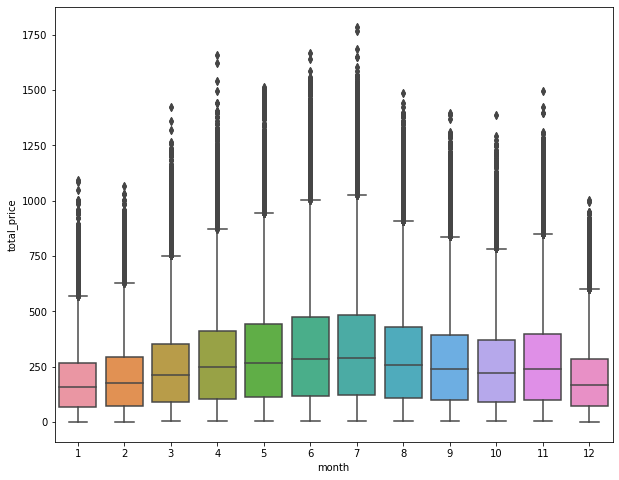

In [17]:
sns.boxplot(data=train, y='total_price',x='month')

<AxesSubplot:xlabel='sale_date'>

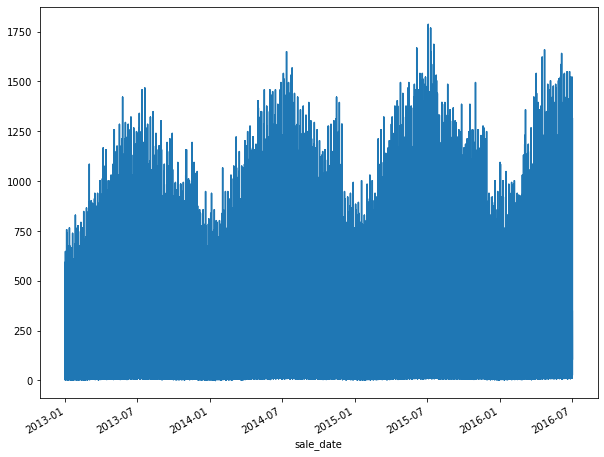

In [18]:
train['total_price'].plot()

In [19]:
y = train[['total_price']]

<AxesSubplot:title={'center':'Monthly Aggregates'}, xlabel='sale_date'>

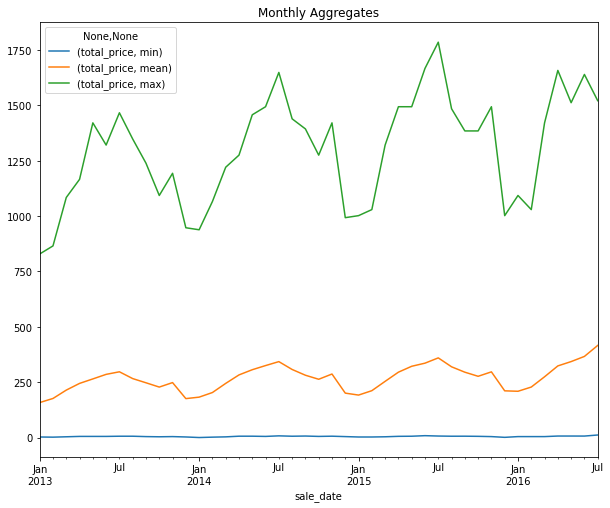

In [20]:
y.resample('M').agg(['min','mean','max']).plot(title='Monthly Aggregates')

<AxesSubplot:title={'center':'Average week-to-week change in total price'}, xlabel='sale_date'>

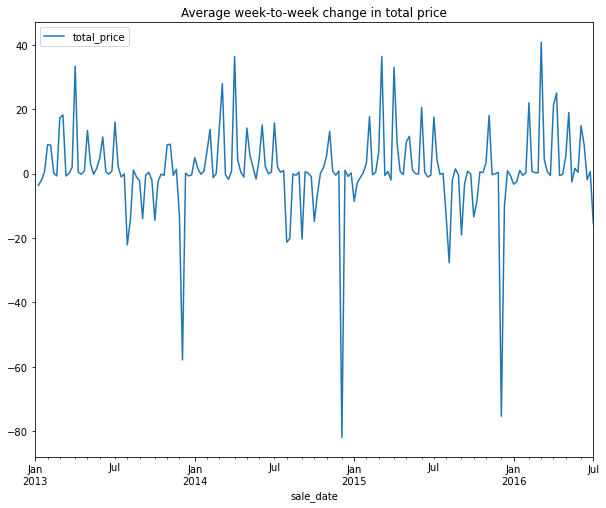

In [21]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in total price')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

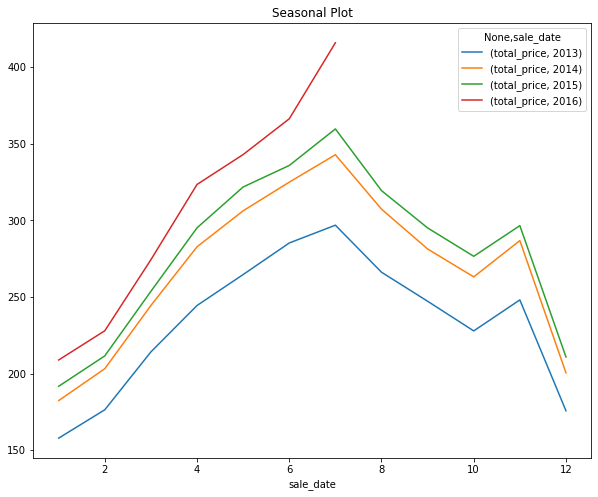

In [22]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

<AxesSubplot:title={'center':'Monthly Aggregates'}, xlabel='sale_date'>

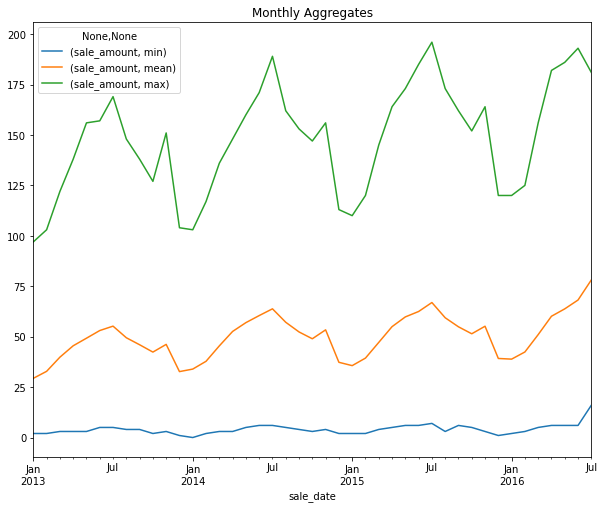

In [23]:
train[['sale_amount']].resample('M').agg(['min','mean','max']).plot(title='Monthly Aggregates')

<AxesSubplot:xlabel='sale_date'>

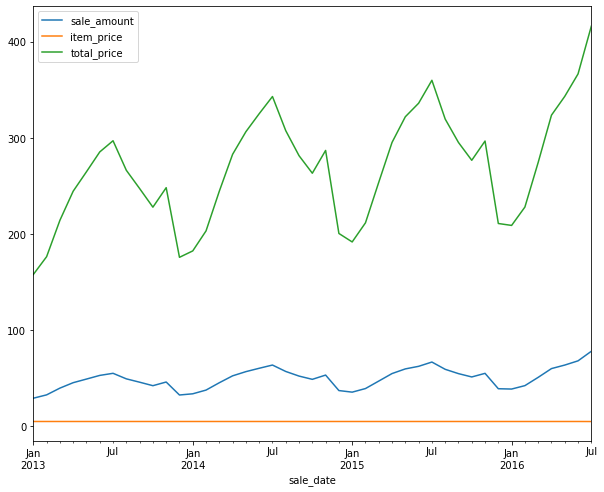

In [24]:
train[['sale_amount','item_price','total_price']].resample('M').mean().plot()

<AxesSubplot:xlabel='sale_date'>

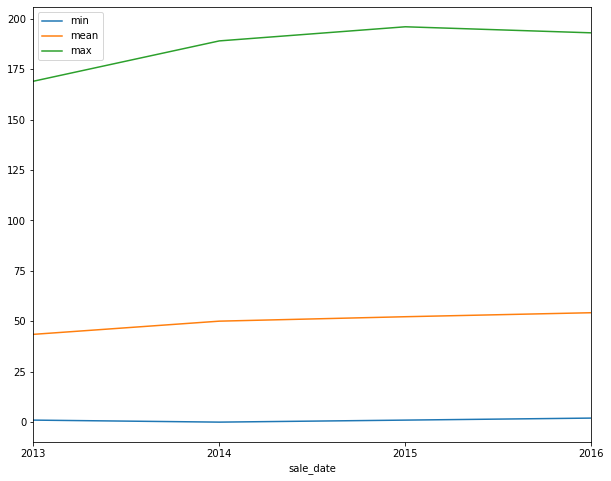

In [25]:
train['sale_amount'].resample('Y').agg(['min','mean','max']).plot()

<AxesSubplot:xlabel='sale_date'>

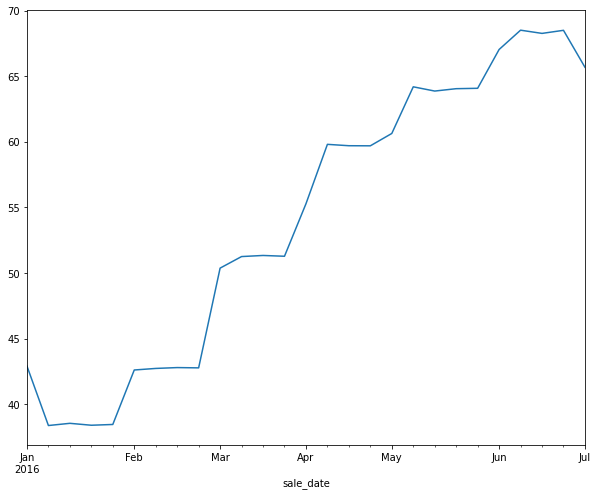

In [26]:
train[train.year==2016].sale_amount.resample('W').mean().plot()


<AxesSubplot:xlabel='sale_date'>

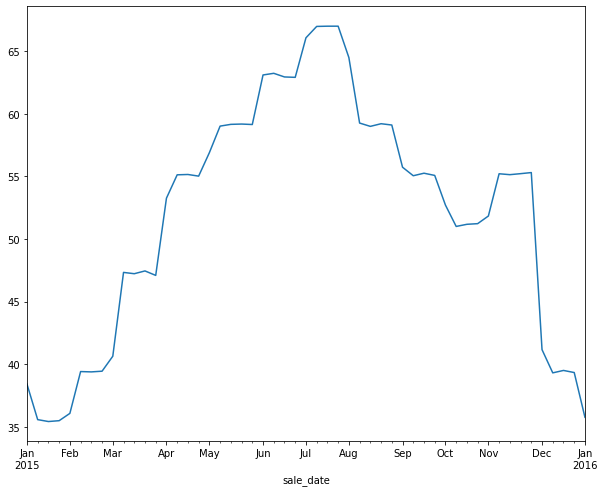

In [31]:
train[train.year==2015].sale_amount.resample('W').mean().plot()
